# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. **One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.**

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.


[pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) was used. 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

**OBS:** The cell below was create for test differents samples that vary significantly from one another. [Numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) was used. 

In [3]:
# TEST TODO: Select three indices of your choice you wish to sample from the dataset
test_indices = np.random.randint(0, 440, 3)
#print test_indices

# Create a DataFrame of the chosen samples
test_samples = pd.DataFrame(data.loc[test_indices], columns = data.keys()).reset_index(drop = True)
#print "Randomly chosen samples of wholesale customers dataset:"
#display(test_samples)

>**Note:** After randomly test different sample, I select the indeces 74, 119, 157 to sample from daaset. I tried to find indices with differents values of features and without outliers. Almost all values are between the first(25%) and third(75%) quartile. 

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [74, 119, 157]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8190,6343,9794,1285,1901,1780
1,8258,2344,2147,3896,266,635
2,17773,1366,2474,3378,811,418


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  


* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2659
* Grocery: 	7951.2773
* Frozen: 3071.9318
* Detergents_paper: 2881.4932
* Delicatessen: 1524.8704

**OBS:** The default values were wrong and I updated with the values output above.

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 

**Simple Box Plot**

I used [pandas.DataFrame.boxplot](http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.boxplot.html)to create a visualization about the distribution of all categories.

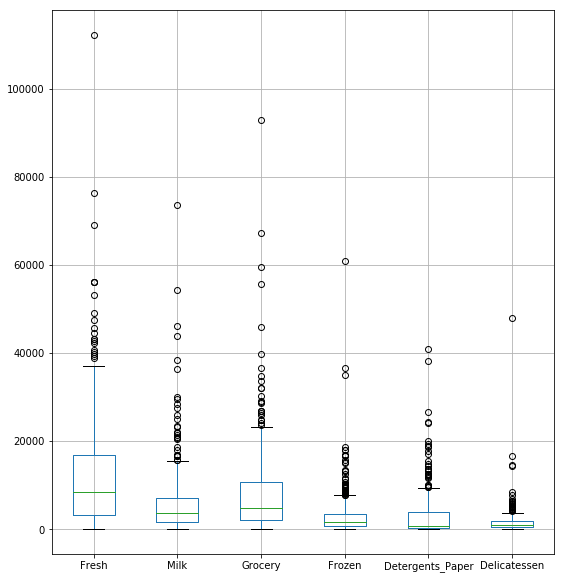

In [5]:
data.boxplot(column=list(data), figsize = (9,10))

** About Categories **

I searched in [Udacity forum](https://discussions.udacity.com/t/project-3-lots-of-guesswork/174839/2) and I fond a good explanation from [Jared Weed](https://discussions.udacity.com/u/Jared) about categories and I will use for my project.

* 'Fresh' : Vegetables, fruits, greens; things you'd most likely find at a farmer's market of sorts.
* 'Delicatessen' : Although the word is more modernized now, I would suspect products like meats, cheeses, and sweets would fall in this category
* 'Milk' : Perhaps this can be more general as in dairy, but this one seems fairly straight-forward
* 'Grocery' : If we exclude the other three product classes above from groceries, then most other food items would be from this product class. Examples like cereals, snack foods, etc.
* 'Detergents_Paper' : This would most likely include paper products and cleaning products. I'd suspect it could include office products, but more than likely it means things like toiletries and products like bleach, soaps, cleaners, etc.
* 'Frozen' : Foods that have been prepared and frozen, or things that are typically left on ice. I'd imagine ice cream would be a product of this, as would be things like prepared meals, frozen meats and vegetables, etc.

In [6]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer Sample 1:** 

In [7]:
#Sample 1: index = 74
display(samples.loc[0:0,:])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8190,6343,9794,1285,1901,1780


* The total purchased cost in Fresh category is significantly below the mean and at the end of second quartile (aprox. 45%);
* The total purchased cost in Milk category is above the mean and is near the end of third quartil (aprox. 70%);
* The total purchased cost in Grocery category is above the mean and is above the third quartile (>75%);
* The total purchased cost in Frozen category is below the mean and is aproximatly at the middle of second quartile;
* The total purchased cost in Detergents_Paper category is below the mean and is aproximatly at the middle of third quartile (aprox 55%); 
* The total purchased cost in Delicatessen category is above the mean and at the end of third quartile (aprox.70%)

>**Conclusion 1:** Based on the analisys above Grocery, Milk and Delicatessen categories exhibit a value rare, in other words, these values are in third or last quartiles. Although Detergents_Paper category  is below the mean, It is at the middle of third quartile and that is important point. Therefore, I think it represents a General Store (mini-supermarket without Fresh produts and butcher shop)  because in my country many neighborhoods have this establishment or that can be Wholesale Retailers, because all categories exhibit high values.

**Answer Sample 2:** 

In [8]:
#Sample 2: index = 119
display(samples.loc[1:1,:])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
1,8258,2344,2147,3896,266,635


* The total purchased cost in Fresh category is significantly below the mean and at the end of first quartile (aprox. 45%);
* The total purchased cost in Milk category is significantly below the mean and is aproximatly at the middle of second quartile;
* The total purchased cost in Grocery category is significantly below the mean and is near the end of first quartile (aprox. 20%);
* The total purchased cost in Frozen category is above the mean and is above the third quartile (>75%);
* The total purchased cost in Detergents_Paper category is significantly below the mean and is near the end of first quartil (aprox. 20%);
* The total purchased cost in Delicatessen category is significantly below the mean and is aproximatly at the middle of second quartile;

>**Conclusion 2:** The Frozen are the highest category for this sample and the Fresh and Delicatessen categories is also a good point for characterize this establishment. So, that can be a Fast Food restaurant, because many things need to be frozen or typically left on ice  for consevation and the speding on Fesh and Delicatessen products to produce snack and  is also significant. 

**Answer Sample 3:** 

In [9]:
#Sample 3: index = 157
display(samples.loc[2:2,:])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,17773,1366,2474,3378,811,418


* The total purchased cost in Fresh category is above the mean and at the begining of third quartile (aprox. 75%);
* The total purchased cost in Milk category is significantly below the mean and is near the end of first quartile;
* The total purchased cost in Grocery category is significantly below the mean and at the begining of second quartile (aprox. 30%);
* The total purchased cost in Frozen category is above the mean and is near the end of third quartile (aprox. 70%);
* The total purchased cost in Detergents_Paper category is significantly below the mean and is near the end of second quartil (aprox. 50%);
* The total purchased cost in Delicatessen category is significantly below the mean and at the begining of second quartile (aprox. 25%);

>**Conclusion 3:** The Fresh are the highest category for this sample and the Frozen and Detergents_Paper categories is also a good point for characterize this establishment. So, that can be a Restaurant, because many things meals use Fresh produts during preparation and the speding on Frozen can be significant depending on the type of restaurant. Detergents_Paper products are also widely used for cleaning the establishment.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
 - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a [decision tree regressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor), set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.
 
>**OBS: **`sklearn.cross_validation.train_test_split` is old. Now: [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**Feature of my choice was 'Fresh'.**

In [10]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(labels='Fresh', axis=1)
#.drop(columns='Fresh')
target_feature = data['Fresh']

# PRINT TEST
#print new_data.head()
#print target_feature.head()

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target_feature, test_size=0.25, random_state=10)

# PRINT TEST
#print X_train.head()
#print y_train.head()

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor().fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "Prediction score of the testing set using  the coefficient of determination R^2 of the prediction: ", score

Prediction score of the testing set using  the coefficient of determination R^2 of the prediction:  -0.516697287359


** Applying the same procedure above looking for to find if one (or more) of the six product categories is actually relevant for understanding customer purchasing.**

In [11]:
for feature in list(data):
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(labels=feature, axis=1)
    target_feature = data[feature]

    # PRINT TEST
    #print new_data.head()
    #print target_feature.head()

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_feature, test_size=0.25, random_state=10)

    # PRINT TEST
    #print X_train.head()
    #print y_train.head()

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor().fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "\n"
    print "###  FOR {} CATEGORY REMOVED ###".format(feature)
    print "\n"
    print "Prediction score of the testing set using the coefficient of determination:  R^2 = ", score
    print "\n"
    print "\n"
    print "#"*90
    print "\n"




###  FOR Fresh CATEGORY REMOVED ###


Prediction score of the testing set using the coefficient of determination:  R^2 =  -0.344186652148




##########################################################################################




###  FOR Milk CATEGORY REMOVED ###


Prediction score of the testing set using the coefficient of determination:  R^2 =  0.333172296197




##########################################################################################




###  FOR Grocery CATEGORY REMOVED ###


Prediction score of the testing set using the coefficient of determination:  R^2 =  0.717335953716




##########################################################################################




###  FOR Frozen CATEGORY REMOVED ###


Prediction score of the testing set using the coefficient of determination:  R^2 =  0.0881309711113




##########################################################################################




###  FOR Detergents_Paper CATEGORY REMOVED ###


P

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** The feature that I choice was "Fresh" and the score of R<sup>2</sup> was -0.346656948184. This feature is necessary for idenfitying customers' spending habits because the **negative** score about prediction without "Fresh" represets that the model was [arbitrarily worse](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.score), in other words, was worse than a horizontal line fixed in the average of true value of target variable "Fresh".  

>**NOTE:** The wikipedia have a good visualization about R<sup>2</sup> interpretation - [Coefficient of determination ](https://en.wikipedia.org/wiki/Coefficient_of_determination)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

* [Pandas Scatter Matrix Plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-scatter-matrix)

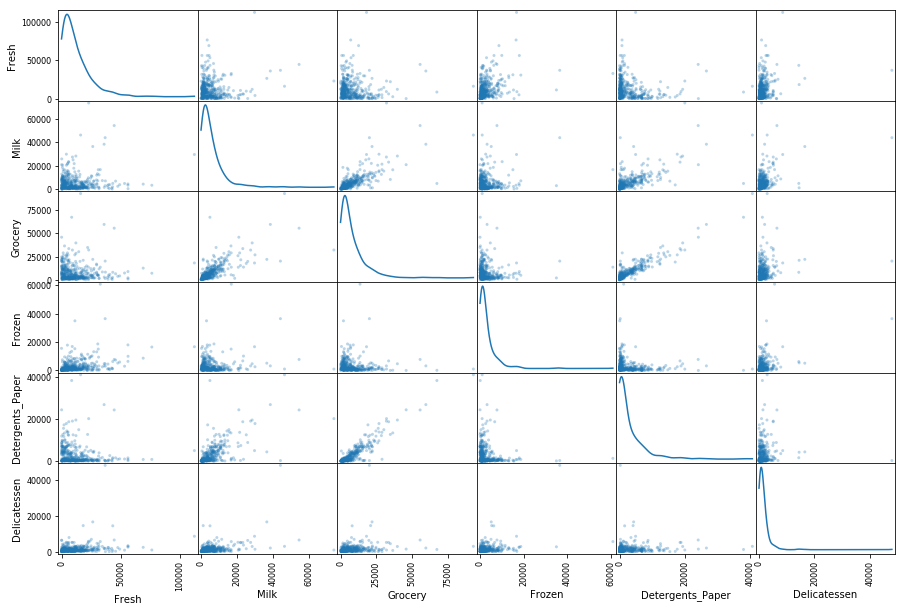

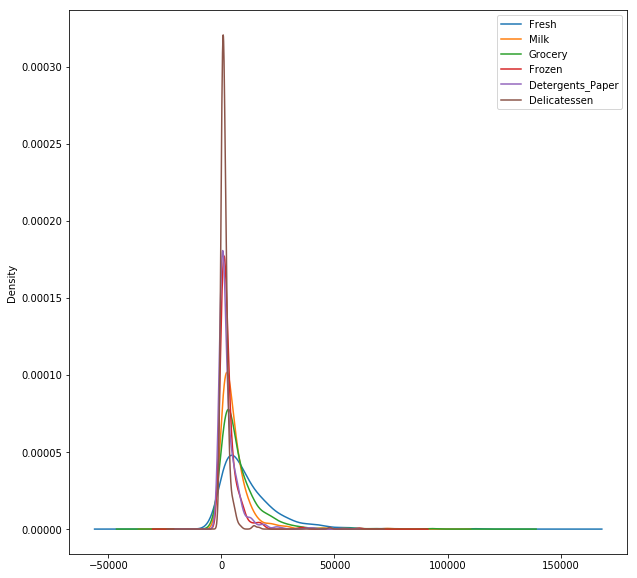

In [12]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix

#Diagonal = density
scatter_matrix(data, alpha = 0.3, figsize = (15,10), diagonal = 'kde');

#Desnsity for each feature (better for visualization)
data.plot.kde(figsize = (10,10));

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


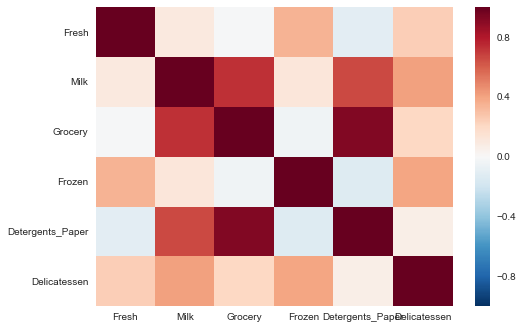

In [13]:
#Feature Correlation 
correlations = data.corr()
display(correlations)

#HeatMap of carrelations
import seaborn as sns
display(sns.heatmap(correlations))

**Answer:** 

**1.** Using the diagonal of Scatter Plot Matrix or the overlapping Desntity Graphs of features, we can see the density distribution and these graphs showed that all features are concetred near the origin zero, but this tendency is acceptable because there is not negative values for the features and it's emphazised by the fact that there are many positives outliers that cause even more impression that they are all concentred. The Desntity Graphs overlapped show an distribution more realistic that represent "normal" distribution without negative tail, so these distribution are not a normal distribution. 


**2.** About the correlation of these features, the Heat Map of correlation shows that almost all features are not correlation (below the red color), but the pair of features below exhibited very good score of correlation:
 
  - Grocery and Detergents_Paper correlation equal 0.924641	
  - Grocery and Milk correlation equal 0.728335 are good, but maybe it was caused by outliers
  - Detergents_Paper correlation equal 0.661816 are good, but maybe it was caused by outliers
 
  This correlation can be identify on the scatter matrix plot of these two features. It's easy to see a proportional correlation between them, a line can be easy traced looking for fit this correlation. See the code image below:

> NOTE: The code below was based on [plotly](https://plot.ly/matplotlib/linear-fits/)

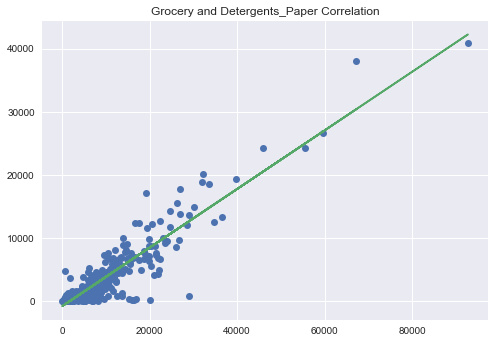

None

In [14]:
import matplotlib.pyplot as plt
from scipy import stats

grocery = data['Grocery']
detergents_paper = data['Detergents_Paper']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(grocery,detergents_paper)
line = slope*grocery+intercept

plt.figure()
plt.plot(grocery,detergents_paper,'o', grocery, line)
plt.title('Grocery and Detergents_Paper Correlation')
display(plt.show())

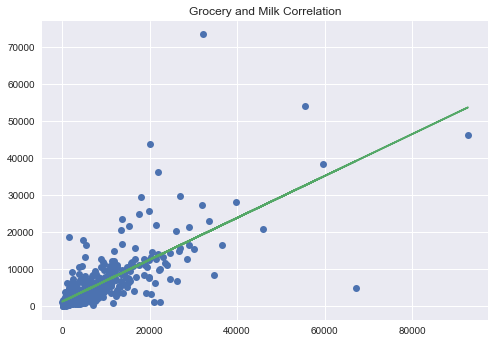

None

In [15]:
import matplotlib.pyplot as plt
from scipy import stats

grocery = data['Grocery']
milk = data['Milk']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(grocery, milk)
line = slope*grocery+intercept

plt.figure()
plt.plot(grocery,milk,'o', grocery, line)
plt.title('Grocery and Milk Correlation')
display(plt.show())

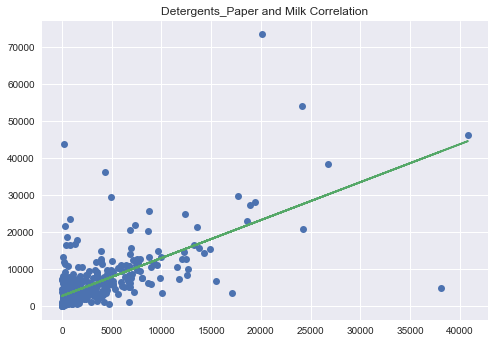

None

In [16]:
import matplotlib.pyplot as plt
from scipy import stats

detergents_paper = data['Detergents_Paper']
milk = data['Milk']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(detergents_paper, milk)
line = slope*detergents_paper+intercept

plt.figure()
plt.plot(detergents_paper,milk,'o', detergents_paper, line)
plt.title('Detergents_Paper and Milk Correlation')
display(plt.show())

**3.** After the analisys above, I confirmed my suspicions about the relevance of the feature that I attempted to predict. The graph showed above and the previous analyzes ("**1.**" and "**2.**") contributed for my prior conclusion.   

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [17]:
#display(samples)

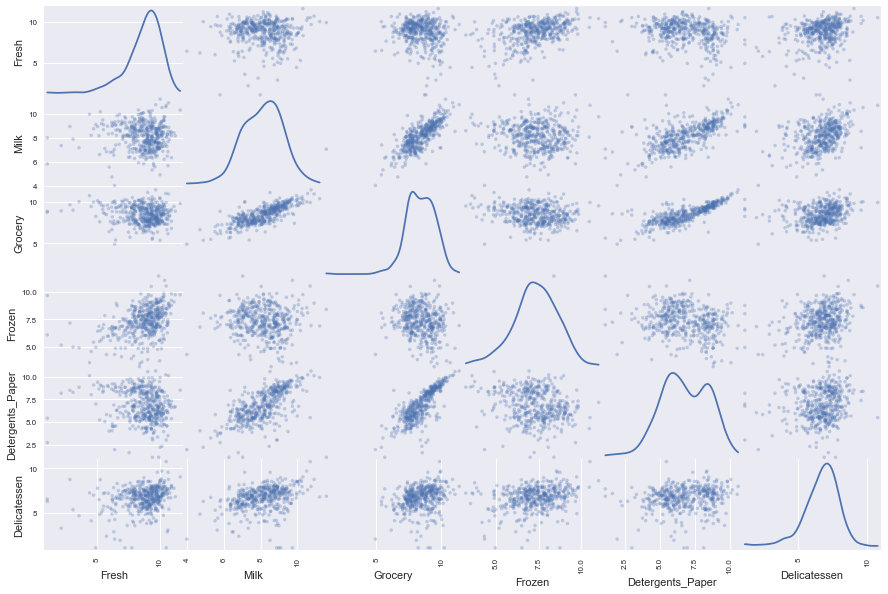

In [18]:
from pandas.plotting import scatter_matrix

# TODO: Scale the data using the natural logarithm
log_data = np.log(data)
#print log_data.head()

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)
#print log_samples.head()

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (15,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [19]:
# Display the log-transformed sample data
display(log_samples)

#Display the original sample data
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.010669,8.755107,9.189525,7.158514,7.550135,7.484369
1,9.018938,7.759614,7.671827,8.267706,5.583496,6.453625
2,9.785436,7.219642,7.813592,8.125039,6.698268,6.035481


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8190,6343,9794,1285,1901,1780
1,8258,2344,2147,3896,266,635
2,17773,1366,2474,3378,811,418


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [20]:
# For each feature find the data points with extreme high or low values
def outlinear(df, feature):
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], 75)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    #Outliners Indices
    out_values = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
    indices = out_values.index
    
    # Display the outliers
    print '-'*120
    print "\n"
    print "###### Data points considered outliers for the feature '{}' ######".format(feature)
    print "\n"
    print "Q1 = {} and Q3 = {}".format(Q1, Q3)
    print "\n"
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    print "\n"
    print '-'*120
    return list(indices)

In [21]:
out_fresh = outlinear(log_data, 'Fresh')
print 'The indices of Fresh outliers are ', out_fresh

out_milk = outlinear(log_data, 'Milk')
print 'The indices of Milk outliers are ', out_milk

out_grocery = outlinear(log_data, 'Grocery')
print 'The indices of Grocery outliers are ', out_grocery

out_frozen = outlinear(log_data, 'Frozen')
print 'The indices of Frozen outliers are ', out_frozen

out_detergents = outlinear(log_data, 'Detergents_Paper')
print 'The indices of Detergents_Paper outliers are ', out_detergents

out_delicatessen = outlinear(log_data, 'Delicatessen')
print 'The indices of Delicatessen outliers are ', out_delicatessen

print '\n'
print '\n'

#Same indices for all features
common_out = list(set(out_fresh).intersection(out_milk, out_grocery, out_frozen, out_detergents, out_delicatessen))
if len(common_out) > 0:
    print 'The common indices for all features are ', common_out
else:
    print "There isn't common outliers indices for all features!!"

#Frequence of indicies into all features
all_out = out_fresh + out_milk + out_grocery + out_frozen + out_detergents + out_delicatessen

print '\n'
print '\n'

import collections
freq_out = collections.Counter(all_out)
print 'The frequences of all outliers indices are: '
print freq_out
print '\n'
print 'The indices that apper more than one time are: '
print freq_out.most_common(5)
print '\n'
print '\n'
print 'The numbers of differents samples classified as outliers are: ', sum(freq_out.values())


# OPTIONAL: Select the indices for data points you wish to remove
#Remove all sample that were exhibited as outliers in more than one feature: 154, 128, 65, 66,75 
outliers  = [154, 128, 65, 66,75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

------------------------------------------------------------------------------------------------------------------------


###### Data points considered outliers for the feature 'Fresh' ######


Q1 = 8.04805870221 and Q3 = 9.73706394795




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382




------------------------------------------------------------------------------------------------------------------------
The indices of Fresh outliers are  [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
------------------------------------------------------------------------------------------------------------------------


###### Data points considered outliers for the feature 'Milk' ######


Q1 = 7.33498124004 and Q3 = 8.88048008859




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275




------------------------------------------------------------------------------------------------------------------------
The indices of Milk outliers are  [86, 98, 154, 356]
------------------------------------------------------------------------------------------------------------------------


###### Data points considered outliers for the feature 'Grocery' ######


Q1 = 7.67461620137 and Q3 = 9.27385367724




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442




------------------------------------------------------------------------------------------------------------------------
The indices of Grocery outliers are  [75, 154]
------------------------------------------------------------------------------------------------------------------------


###### Data points considered outliers for the feature 'Frozen' ######


Q1 = 6.60967774917 and Q3 = 8.17589608318




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244




------------------------------------------------------------------------------------------------------------------------
The indices of Frozen outliers are  [38, 57, 65, 145, 175, 264, 325, 420, 429, 439]
------------------------------------------------------------------------------------------------------------------------


###### Data points considered outliers for the feature 'Detergents_Paper' ######


Q1 = 5.54810142479 and Q3 = 8.27434059875




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101




------------------------------------------------------------------------------------------------------------------------
The indices of Detergents_Paper outliers are  [75, 161]
------------------------------------------------------------------------------------------------------------------------


###### Data points considered outliers for the feature 'Delicatessen' ######


Q1 = 6.01187465693 and Q3 = 7.50672842655




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372




------------------------------------------------------------------------------------------------------------------------
The indices of Delicatessen outliers are  [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]




There isn't common outliers indices for all features!!




The frequences of all outliers indices are: 
Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})


The indices that apper more than one time are: 
[(154, 3), (128, 2), (65, 2), (66, 2), (75, 2)]




The numbers of differents samples classified as outliers are:  48


**References:**

- [Boolean indexing](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
- [collections.Counter](https://docs.python.org/2/library/collections.html#collections.Counter)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**There are 48 samples classified as outliers in at least one feature. There isn't data points considered outliers for all features, but for more than one, based on the definition above, I fond 5 samples. I think that these points need to be removed, bacause if these point are outliers for 2 or 3 features out of the six,  they have a high likelyhood to be a noisy data. So, I decided to remove the samples with indices 154, 128, 75, 66 65.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.


** Analysing the Correlation Matrix for *Good Data: * **

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.024118,-0.129560,0.350749,-0.149014,0.212536
Milk,-0.024118,1.000000,0.779038,-0.064477,0.672506,0.332025
Grocery,-0.129560,0.779038,1.000000,-0.169742,0.790393,0.237129
Frozen,0.350749,-0.064477,-0.169742,1.000000,-0.214833,0.226074
Detergents_Paper,-0.149014,0.672506,0.790393,-0.214833,1.000000,0.160144
Delicatessen,0.212536,0.332025,0.237129,0.226074,0.160144,1.000000


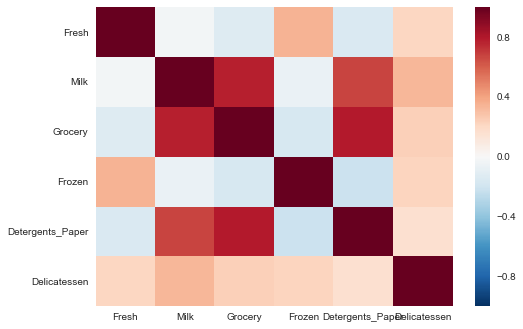

In [22]:
#Feature Correlation 
good_correlations = good_data.corr()
display(good_correlations)

#HeatMap of good_correlation
import seaborn as sns
display(sns.heatmap(good_correlations))

>**NOTE:** Just Delicatessen have a positive correlation with all other features. All the others exhibit positive or nagative correlations depending on the feature. 

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import [`sklearn.decomposition.PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

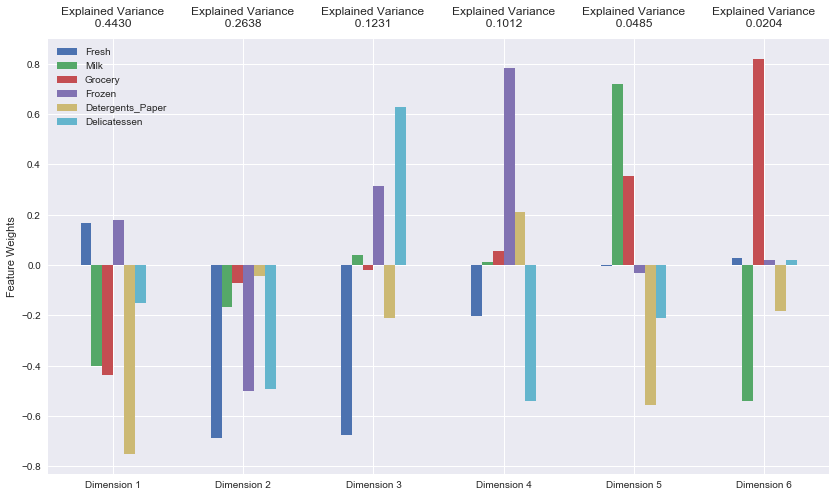

In [23]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [24]:
print "The weights for the 6 Principal Components: "
print '\n'
print pca.components_

The weights for the 6 Principal Components: 


[[ 0.16746374 -0.40143866 -0.43811142  0.17820975 -0.75142613 -0.14987105]
 [-0.68593522 -0.16722783 -0.07072902 -0.50054207 -0.04244398 -0.49414702]
 [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
 [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]
 [-0.00261356  0.71923846  0.3553861  -0.0330861  -0.55815441 -0.20918629]
 [ 0.02915623 -0.54018269  0.82053348  0.02054106 -0.18238824  0.01974794]]


In [25]:
print "The explained variation ratio for the 6 Principal Components:"
print "\n"
print pca.explained_variance_ratio_

The explained variation ratio for the 6 Principal Components:


[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). 
* Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

   In total (cumulative), 70.68% of variance in the data is captured by first and second dimensions. By the first 4 dimensions, 93.11% of variance in the data is explained and that is a good proportion and maybe can be a good number of Principal Componets, reducing from 6 independent features for 4 new features where each one is a combination of all old features. In terms of customer spending, these 4 Dimensions represent a low information loss because more than 90% of the variace of original data is captured.
    
   The sign of the weights in each Principal Components doesn't matter for these analysis, because these signs are in accordance with the direction of the axes of the respective Pricipal Component. So, for us, the absolute os these weights is the important point. The magnitude of the weights tell for us which are the pricipal (most imporant) features  for each Pricipal Component, in other words, which are the features that are most strongly correlated with each Dimension. Each Principal Componet fond by PCA can be represented for a linear combination of all features basen on the weights showed above.  
    
    
   Therefore, Analysing each Dimnesions (new feature) is possible to identify some characteristics:
    
   - Dimension 1 is the axis that represts the largest amount of variance. This Principal Component maily represets Milk, Grocery and Detergents_Paper categories and only will be positive if the amount of these features are very small and the Fresh and Milk are very large, otherwise will be negative, based mon this weights.
   - Domension 2 maily represents Fresh, Frozen and Delicatessen categories and always will display a negative value because all weights are negatives. 
   - Dimension 3 manly represents Fresh and Delicatesen cateogires and Frozen is also significant. For this Principal Component is difficult to know if will diplay positive or negaive value. The values of Fresh and Delicatessen, probably, will define this sign.
   - Dimension 4 manly represets Frozen and Delicatessen categories. If the Delicatessen don't exhibit a value much bigger than others, this Principal Componet probaly will display a positive value bacuase the Frozen weight tend to hold this value as positive, otherwise, is difficult to predict this sign.
   - Dimension 5 manly represents Milk and Detergents_Paer cateogires and Crocery is also significant. For this Principal Component is difficul to predict the sign that ussualy will be displayed.
   - Dimnesion 6 manly represents Grocery and Milk categories, and if these Feature exhibited very differents values, the highest value will define the sign, positive for Grocery and negative for Milk. Otherwise, is difficult to predict this sign.
    
 
REFERENCES:
    
* [Stack Overflow - Negative Componets](https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative)
* [Research Gate- What negative sign mean in PCA?](https://www.researchgate.net/post/what_negative_sign_mean_in_PCA)
* [Principal Component Analysis - negative loadings](https://www.theanalysisfactor.com/principal-component-analysis-negative-loadings/)
* [Explained variance in PCA](https://ro-che.info/articles/2017-12-11-pca-explained-variance)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.2427,-0.6629,0.1309,-0.4027,0.1303,0.1422
1,1.6532,-0.3571,0.2328,0.5164,0.1515,-0.2040
2,1.1358,-0.5719,-0.8546,0.7091,-0.7185,0.0118


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.2427,-0.6629
1,1.6532,-0.3571
2,1.1358,-0.5719


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

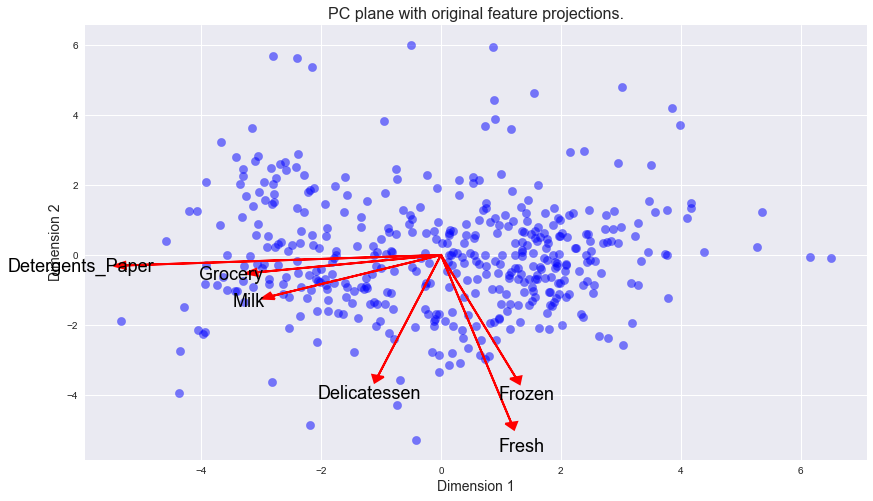

In [29]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:**

From the bitplot, the first componets (Dimenstion 1) is most correlated with  `'Milk'`, `'Grocery'` and `'Detergents_Paper'` and the second component (Dimension 2) is most correlated with `'Fresh'`, `'Frozen'` and `'Delicatessen'`. These observations agree with the `pca_results` that I obtained earlier, the three most weighted features for each dimension are exactly these features.  

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* **K- Means Clustering:**
   
    K-Means Clsutering algorithm works repeatly in two steps: `Assign` and `Optimize`. This model starts with the assumption that all given data points belongs to one specific cluster where all cluster centers were fized randomly for this first step, this is the first `Assign`. After that, the algorithm starts to minimize the total quadratic distance (Euclidian distance) moving the center to the optimal position, where the distance between the cluster center and their poitns is minimal, this is the `Optimize`step. After that, the K-means reassigns all points to nearst cluster (`Assign`). So, this algorithm will work in these two step until converge. As in each iteration all points belong to a specific cluster, this algotihm perform `hard assignment`, so it's a **hard clustering**.
    
    *Advantages*: running time; better for high dimensional data; easy to interpret and implement; [1]
    
    *Disadvantages:* cluster are always spherical; not good for non-linear data/complex shape; hard assignment can result in mis grouping; [1]
    
    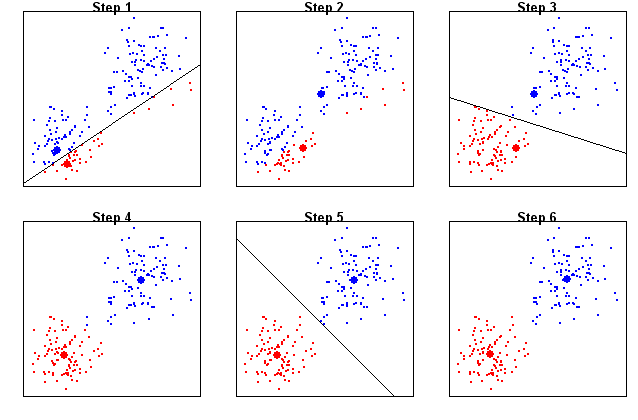
                                                        K-Means algotihm [4]
    
    OBS: As the K-Means Clustering is a `Hill Climbing` algorithm, the results are extremely dependent on where the initial cluser centers are fixed, but this problem can be solve perform "random restart" many times.
    
    
    

* **Gaussian Mixture Model:**

    For the case where we are uncertain about which cluster the data points belong, what is the shape of each cluster and what is the probability that a point is in specific cluster (the points not coming from a specific cluster), we need to use a probabilistic clustering. The   Gaussian Mixture Model clustering algorithm is a common example for this propouse and this model perform a `solf assignment`, so it's a **solf clusering**. This algorithm "assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters."[3] These unknown parameters are learned by  [expectation-maximization](http://scikit-learn.org/stable/modules/mixture.html#expectation-maximization) (EM) algorithm.
    EM works repeatly in two steps. First one assumes random components (initical centers) and computes for each point a probability of being generated by each component of the model looking for "assign" the points, this is a `Expectation` step. Then, tune the parameters to maximize the likelihood of the data given those assignments, re estimating the means, variance and mixing weight, based on the solf assignment, this is a `Maximization` step. So, this algorithm will work in these two step until converge. 
    
    *Advantages*: Does not assume clusters to be of any geometry (works with non-linear distributions); Dos not bias the cluster sizes to have specific structures as does by K-Means (Circular); [1]
    
    *Disadvantages*: Difficult to interpret;  Uses all the components it has access to (difficult when dimensionality of data is high) [1]
    
    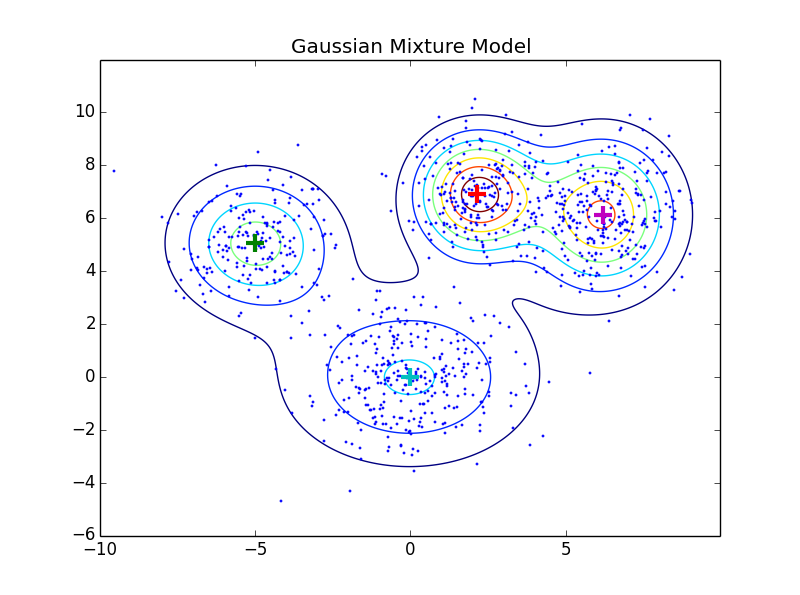
                                                         Gaussian Mixture Model [5]
    
    
    
    
**FOR THIS APPLICATION...**

   The correlation matrix shows that correlation between original features are not simple, there isn't a clear correlation between them. 
   
   The biplot exhibited a very dispersed distribution, without 2 defined groups, so, this data set is not linearly separable, many points can belong to both components.  
   
   Therefore, I will use the Gaussian Mixture Model for perform the clustering. 

> References:

>[Phanindra Varma, M.L. Engineer, Quora Quastion [1]](https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

> [David Rosenberg - New York University [2]](https://davidrosenberg.github.io/ml2015/docs/13.mixture-models.pdf)

> [Gaussian mixture models - Scikit Learn [3]](http://scikit-learn.org/stable/modules/mixture.html)

> [K-Means algorithm [4] ](http://astrostatistics.psu.edu/su09/lecturenotes/clus2.html)

> [Gaussian Mixture Model - [Yu Zhu](https://plus.google.com/107804415240862705505) [5]](http://yulearning.blogspot.com.br/2014/11/einsteins-most-famous-equation-is-emc2.html)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

#List of diferents number of clusters
n_cluster = [2, 3, 4, 5, 6, 10, 15, 20]

for number in n_cluster:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer_test = GaussianMixture(n_components=number).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds_test = clusterer_test.predict(reduced_data)


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score_test = silhouette_score(reduced_data, preds_test)
    print "\n"
    print "For {} clusters, the silhouette score is {}.".format(number, score_test)
    print "\n"
    print "--"*60



For 2 clusters, the silhouette score is 0.421916846463.


------------------------------------------------------------------------------------------------------------------------


For 3 clusters, the silhouette score is 0.37420184754.


------------------------------------------------------------------------------------------------------------------------


For 4 clusters, the silhouette score is 0.293269564847.


------------------------------------------------------------------------------------------------------------------------


For 5 clusters, the silhouette score is 0.305424160016.


------------------------------------------------------------------------------------------------------------------------


For 6 clusters, the silhouette score is 0.287508609446.


------------------------------------------------------------------------------------------------------------------------


For 10 clusters, the silhouette score is 0.32879696278.


------------------------------------

>**NOTE**: Now that I found the best number of cluster I will assign all variable as required above.

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print "For 2 clusters, the silhouette score is {}.".format(score)

For 2 clusters, the silhouette score is 0.421916846463.


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* For 2 clusters, the silhouette score is 0.421916846463.

* For 3 clusters, the silhouette score is 0.31324474615.

* For 4 clusters, the silhouette score is 0.32084552387.

* For 5 clusters, the silhouette score is 0.332775637401.

* For 6 clusters, the silhouette score is 0.329943779749.

* For 10 clusters, the silhouette score is 0.287489959593.

* For 15 clusters, the silhouette score is 0.340063706031.

* For 20 clusters, the silhouette score is 0.290398760589.

The best silhouette score is 0.42192 with 2 clusters. 

**BONUS:** If the data were reduced to 4 components instead just 2, looking for to capture 93.11% of variance in the data.

In [32]:
# TODO: Apply PCA by fitting the good data with four dimensions
pca2 = PCA(n_components=4).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data2 = pca2.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples2 = pca2.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data2 = pd.DataFrame(reduced_data2, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

#List of diferents number of clusters
n_cluster2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

for number in n_cluster2:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer2 = GaussianMixture(n_components=number).fit(reduced_data2)

    # TODO: Predict the cluster for each data point
    preds2 = clusterer2.predict(reduced_data2)


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score2 = silhouette_score(reduced_data2, preds2)
    print "\n"
    print "For {} clusters, the silhouette score is {}.".format(number, score2)
    print "\n"
    print "--"*60



For 2 clusters, the silhouette score is 0.279470709655.


------------------------------------------------------------------------------------------------------------------------


For 3 clusters, the silhouette score is 0.179421160238.


------------------------------------------------------------------------------------------------------------------------


For 4 clusters, the silhouette score is 0.177018069388.


------------------------------------------------------------------------------------------------------------------------


For 5 clusters, the silhouette score is 0.159939657541.


------------------------------------------------------------------------------------------------------------------------


For 6 clusters, the silhouette score is 0.164275034271.


------------------------------------------------------------------------------------------------------------------------


For 7 clusters, the silhouette score is 0.181479309035.


-----------------------------------

>** NOTE**: The silhouette score is worse than reduced data with only 2 components, but the best number of clusters for 4 components also was 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

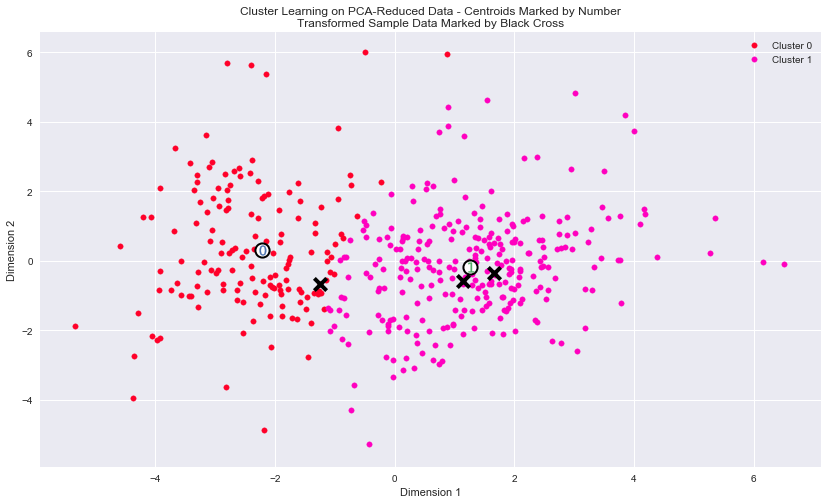

In [33]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [34]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
#print 'Log Centers: ', log_centers
#print '\n'

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**`The mean values of original data:` **

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

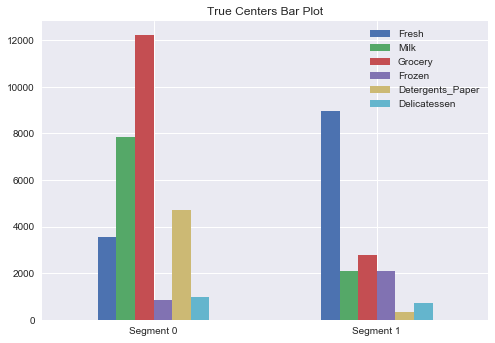

In [35]:
# Display a description of the dataset
display(data.mean())

#Display the bar plot of True Centers
bar = true_centers.plot.bar(rot=0)
bar.set_title("True Centers Bar Plot")

**`The Bar plot of true centers and mean values of original data:`**

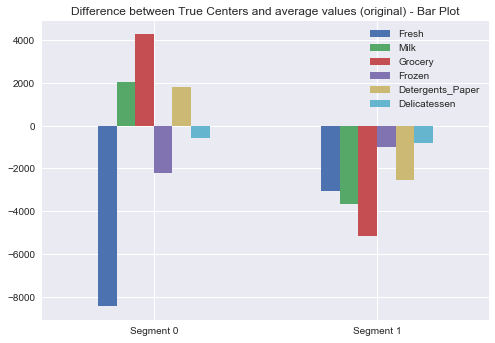

In [36]:
means  = data.mean()
#print means, type(means)

diff_mean = true_centers - means
#print diff_mean, type(diff_mean)
#display(diff_mean)

bar_diff = diff_mean.plot.bar(rot=0)
bar_diff.set_title("Difference between True Centers and average values (original) - Bar Plot")

**`The Bar plot of True Centers and True mean:`**

In the cell below, I recover the representative customer spending from the reduced_data points by applying the inverse transformations and *np.exp()*. 

The Means of 'cleaned data' are: 


Fresh               11676.659770
Milk                 5011.133333
Grocery              7227.731034
Frozen               2157.735632
Detergents_Paper     2827.756322
Delicatessen         1172.413793
dtype: float64

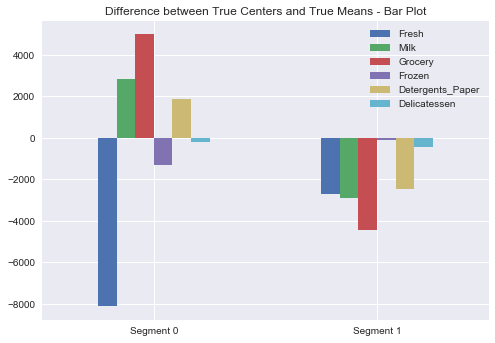

In [37]:
#Inverse transform the reduced data
good_data2 = pca.inverse_transform(reduced_data)

#Exponentiate the data points
data2 = np.exp(good_data2)

#Display the true data
true_data = pd.DataFrame(np.round(data2), columns = data.keys())
#display(true_data)

#Mean of good data (outliers removed)
true_means = true_data.mean()
print "The Means of 'cleaned data' are: "
display(true_means)

#Difference between true center and true means
diff_mean2 = true_centers - true_means

#Bar plot of difference
bar_diff = diff_mean2.plot.bar(rot=0)
bar_diff.set_title("Difference between True Centers and True Means - Bar Plot")


In [38]:
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


**Answer:**

* `SEGMENT 0:` This customer segment purchase a lot of `Grocery`, `Milk` and `Detergents` categories, but the other categories, except `Fresh`, the spending are significants (higher or near the average). Therefore, this establishment works on large scale and doesn't sell `Fresh` products, thus can be a wholesale retailers or a large supermaket that purchase `Fresh` products from another source.


* `SEGMENT 1:` For this segmennt, based on the mean values, the mainly spending are in `Frozen` and `Delicatessen` categories (near the True means) but these categories are not good to characterize this segment because this customer segment doesn't spending above the avegere in any category. Thereby, the most important Bar graph for this segment is the **True Centers Bar Plot**. Thus, this customer segment purchase manly in `Fresh` products and the `Grocery`, `Milk` and `Frozen` categories also is important and the others (`Delicatessen` and `Detergents_Paper`) are insignificants magnitudes. Therefore, this segment doesn't sell `Detergents_Paper` and `Delicatessen` as a product, probably just use on theirs products. Thus, this establishment can be a cafe or a restaurant. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [39]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [40]:
#Display original samples
print "Original samples features values:"
display(samples)

print "\n"
print "\n"

#Display original samples
print "PCA Samples values:"
display(pca_samples)

print "\n"
print "\n"

#Display True Centers
display(true_centers)

Original samples features values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8190,6343,9794,1285,1901,1780
1,8258,2344,2147,3896,266,635
2,17773,1366,2474,3378,811,418






PCA Samples values:


array([[-1.24265932, -0.66288918],
       [ 1.65320711, -0.35712761],
       [ 1.13579908, -0.57190446]])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


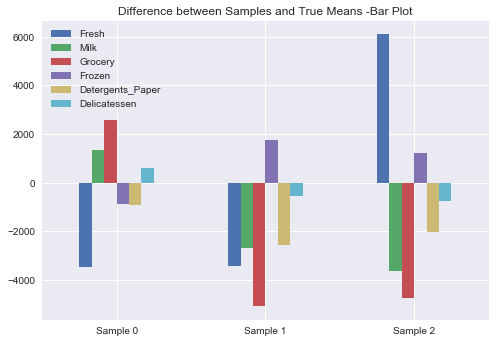

In [41]:
#Bar plot of difference betweeb Samples and true means values
diff_samples = samples - true_means
samples_bar = diff_samples.plot.bar(rot=0)
samples_bar.set_title("Difference between Samples and True Means -Bar Plot")
samples_bar.set_xticklabels(["Sample 0", "Sample 1", "Sample 2"])


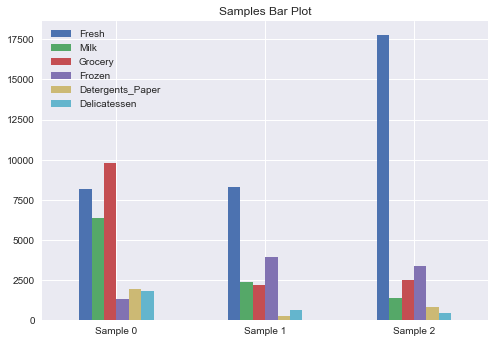

In [42]:
#Bar plot of Samples
samples = samples 
samples_bar = samples.plot.bar(rot=0)
samples_bar.set_title("Samples Bar Plot")
samples_bar.set_xticklabels(["Sample 0", "Sample 1", "Sample 2"])

**Answer:** All analysis below was based on my analisys in **Question 1** and the two graphs above.

* `SAMPLE 0:`Grocery, Milk are very significant becuase exhibited values above the mean and represent a large proportion of total spending. Detergents_Paper categories is important because also is above the mean and Fresh, althogh exhibit a high proportion of total spending, it is not important because is extremly below the mean and other cateogries exhibited similar magnitudes even with lower average. Therefore, the customer segment that better represent this sample is `SEGMENT 0` and the result above that predicted this sample as `Cluster 1` is extremly consistent with **Question 8**.


* `SAMPLE 1:`  Frozen is significant because is above the mean and is the second largest spending. The Fresh is also important becuase the exhibited value is very large than all other, although it is below the average (almost all categories are below the average). Detergents_Paper category exhibit a values insigniticants. Thereby, the customer segment that better represent this sample is `SEGMENT 1`. Therefore the result above that predicted this sample as `Cluster 0` is consistent with **Question 8**.



* `SAMPLE 2:` Fresh and Frozen are significant becuase exhibited value above the mean and represent a large proportion of total spending. Detergents_Paper and Delicatessen exhibit values insigniticants. Therefore, the customer segment that better represent this sample is `SEGMENT 1` and the result above that predicted this sample as `Cluster 0` is extremly consistent with **Question 8**.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** 

   The wholesale distributor can use the customer segments 0 and 1 to apply `A/B test` and test the effect of the change in the frequence of delivery service. Of course each segment/custumer will react differently, because each establishment has its work routine and can be more or less effected. 
    
   Probably, `SEGMENT 0` will react positively because the products purchased by these customers are almost all non-perishable in a short time and can be stored in large quantities if there is sufficient space in the establishment. On the other hand, the customer of `SEGMENT 1` possibly will react negatively because this type of customer purchase a large quantity of perishable products and thereby need to receive fresh products frequently, more than 3 days a week. 
    
   Perform the `A/B Test` in samples from both groups of segments will show the true feedback of customers, my analysis was only intuitive and can be broken by `A/B Test`.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** 

Knowing the estimates for antecipated annual spending of each product category, for classify each new customer to a *customer segment* I thought in to possibilities.

* **`Option 1:`** I can use the same strategy applied during this project. The code below shows an **SIMPLE** code example to perform the steps to predict the *customer segment* for new customers based on the previous steps performed since the beginning of this project.

In [43]:
def new_preds(new_data):
    '''
    input: new_data must be a dataframe of new data 
    return: a list (array) of binary values that represent the segment for each new customer 
    '''
    
    
    #Feature scaling
    log_data = np.log(new_data)
    
    #Feature transformation
    reduced = pca.transform(log_data)  #where: pca = PCA(n_components=2).fit(good_data)
    
    #Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)  # where: clusterer = GaussianMixture(n_components=2).fit(reduced_data)
    
    return preds

* **`Option 2:`** Now that I classify the unlabel data, I have a new label data (*reduced_data* in this project) that can be used into a supervised learn method/algorithm. As in the `Option 1`, the new data need to be prepared (feature scaling and transofmation) because now the dataset base for supervised learner will be the data set after log scaling and PCA transformation. 
After "data processing" step, it is possible to use one supervised learning classifier using the reduced_data as base. The supervised learner will use a part of label data (*reduced_data*) to learn the pattern and will be tested with the remaining data for verify the performance of the learner. So, after tune and find the best learner based on label data, the data of new customers can be applied into this classifier for determine (predict) the *customer segment* for each new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

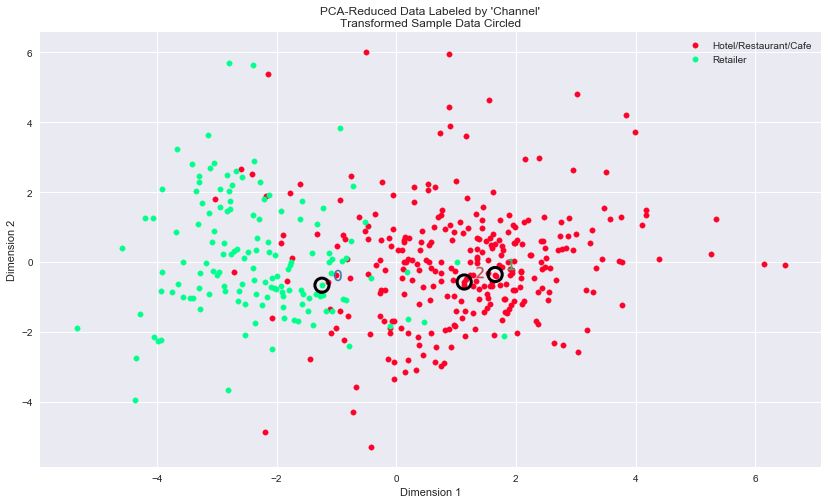

In [44]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

Compared to this underlying distrbution of `HoReCa`to `Retail`, the cluster algotihm perform a good work, because:

- The number of clusters that I've chosen is the same number of differents possibility of the *Channel* feature.  
- The vertical visual "decision boudary" exhibited by my clustering visualisation is in the same range (Dimension 1 [-2,0]) of this underlyting distribution. 

The most difference between them is in the boudary between the classes. The underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers is less clear, that is, the size of the region with a mixture of labels is larger than in my clustering. Beyond this doudary region, the underlying distribution exhibit points classified as `HoReCa` on the left where the region is predominantly classified as `Retailer` and  on the right region occurs the same: region predominantly `HoReCa` with points classified as `Retailer`. Although this merge occurs, there are customer segments that would be classified as  'Retailers' or 'Hotels/Restaurants/Cafes'. The `Cluster 1`(*SEGMENT 0*) can be classified as **Retailer** and the  `Cluster 0`(*SEGMENT 1*) can be classified as **Hotels/Restaurants/Cafes**.

I my opinion, the classification perform by Gaussian Mixture Model clustering algorithm was good because the "True Distribution" (with Channel feature) was consitent with my previous definition of customer segments and division between the two differents clusters is similar to the Channel feature(`HoReCa` and `Retail`).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.